###Week 10: Neural Networks with TensorFlow/Keras
Objective: Introduce deep learning basics with neural networks.

####Experiment 10:

Build a simple neural network to classify handwritten digits using TensorFlow/Keras.
* The images are flattened from 28x28 matrices into 1D vectors of
length 784 to be fed into the neural network.
* Input Layer: The input is a flattened vector of size 784 (28x28).
* Hidden Layer: A dense layer with 128 neurons and ReLU activation. This layer allows the model to learn complex patterns.
* Dropout Layer: A dropout layer with a rate of 0.2, which helps reduce overfitting by randomly setting some of the weights to zero during training.
* Output Layer: A softmax layer with 10 neurons for classifying the digits from 0 to 9.
* Show the Test Accuracy, model's performance over epochs (accuracy plot), loss plot indicates whether the model is converging

Note: We can use MNIST Dataset: The MNIST dataset contains 60,000 training images and 10,000 test images of handwritten digits (0-9).

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
# Load the MNIST dataset
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step 


In [3]:
# Normalize the images (scale pixel values to 0-1 range)
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
# Flatten the images
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [5]:
# Build the neural network model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

C:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8578 - loss: 0.4883 - val_accuracy: 0.9577 - val_loss: 0.1392
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9547 - loss: 0.1524 - val_accuracy: 0.9700 - val_loss: 0.1005
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9665 - loss: 0.1098 - val_accuracy: 0.9719 - val_loss: 0.0899
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9710 - loss: 0.0938 - val_accuracy: 0.9754 - val_loss: 0.0779
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9769 - loss: 0.0712 - val_accuracy: 0.9779 - val_loss: 0.0732
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9796 - loss: 0.0634 - val_accuracy: 0.9755 - val_loss: 0.0750
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9818 - loss: 0.0557 - val_accuracy: 0.9798 - val_loss: 0.0681
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9825 - loss: 0.0531 - 

In [8]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 - 1s - 3ms/step - accuracy: 0.9788 - loss: 0.0703
Test Accuracy: 0.9788


In [9]:
# Plot training history
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

Text(0.5, 1.0, 'Model Accuracy')

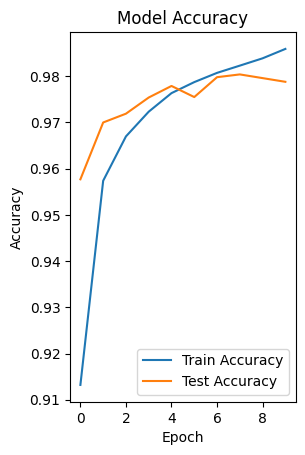

In [10]:
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

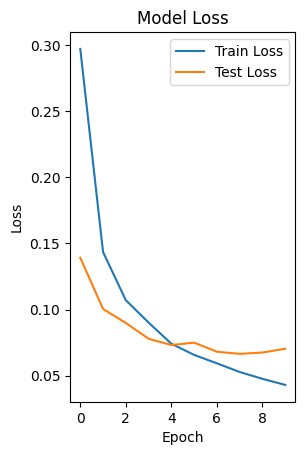

In [11]:
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()